## Assignment 1

In [1]:
#import library first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
import folium
from folium import plugins

mpl.style.use(['ggplot'])

### Import and Checking Data

#### reading data

In [2]:
# mengambil data dari file csv
df = pd.read_csv('dataset/london_crime_by_lsoa.csv')

# melihat sekilas data yang ada
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


#### checking data type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


#### checking null value

In [4]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

###### no null value, no need to drop or fill data :)

In [5]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


### Getting Information from Visualizing the Data

#### bagaimana angka pertumbuhan kejahatan pertahun dari 2008 - 2016 di London ?

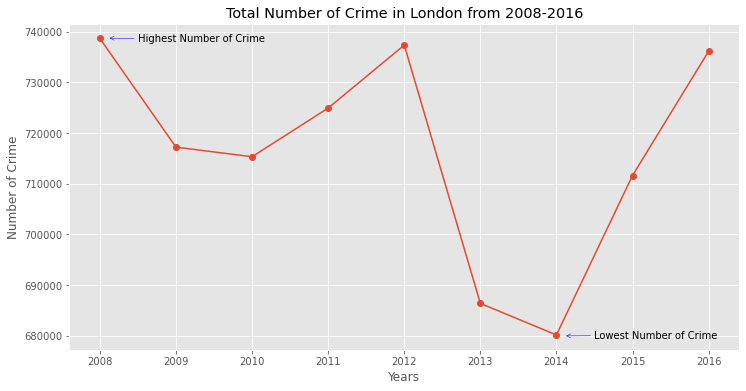

In [6]:
#sum data pertahun dari data yang telah ada
df.groupby('year')['value'].sum().plot(figsize=(12,6), marker='o')

plt.xlabel('Years')
plt.ylabel('Number of Crime')
plt.title('Total Number of Crime in London from 2008-2016')

plt.annotate('Highest Number of Crime', xy=(2008.1,738700), arrowprops=dict(arrowstyle='->', color='b'),xytext=((2008.5,738000)))
plt.annotate('Lowest Number of Crime', xy=(2014.1,680000), arrowprops=dict(arrowstyle='->',color='b'),xytext=((2014.5,679500)))
plt.show()

##### dari sini kita mengetahui bahwa :
- angka kejahatan paling tinggi ada pada tahun 2008 sekitar kurang sedikit dari 740.000an kasus
- angka kejahatan terendah ada pada tahun 2014 sekitar 680.000an kasus
- walaupun sempat turun sejak 2013, tetapi angka kejahatan mulai naik lagi saat 2015 

#### Bagaimana angka kejahatan bulanan di London tahun 2016?

In [7]:
# ambil data tahun 2016, lalu group by berdasarkan major category dan bulan
df_by_month = df[df['year'] == 2016].groupby(['major_category', 'month'])['value'].sum().reset_index()

# membuat data dengan metode pivot table, sehingga kita dapat membuat bulan menjadi index
df_by_month = pd.pivot_table(df_by_month, values='value', index='month', columns='major_category')

# membuat kolom total, agar kita dapat mengetahui total angka kejahatan perbulan
df_by_month['Total'] = df_by_month.sum(axis=1)
df_by_month

major_category,Burglary,Criminal Damage,Drugs,Fraud or Forgery,Other Notifiable Offences,Robbery,Sexual Offences,Theft and Handling,Violence Against the Person,Total
month,,,,,,,,,,
1,6302,5049,3828,0,1276,1810,0,22316,18266,58847
2,5841,5010,3397,0,1133,1646,0,22028,17642,56697
3,5804,5092,3324,0,1256,1711,0,23117,18863,59167
4,5335,5224,3389,0,1302,1570,0,23149,18668,58637
5,5404,5967,3276,0,1543,1787,0,25374,20639,63990
6,5381,5338,3041,0,1432,1885,0,24722,20463,62262
7,5387,5773,3372,0,1457,1960,0,25837,21733,65519
8,5406,5584,3442,0,1386,1910,0,25176,19762,62666
9,5280,5210,3091,0,1318,1980,0,24999,19534,61412


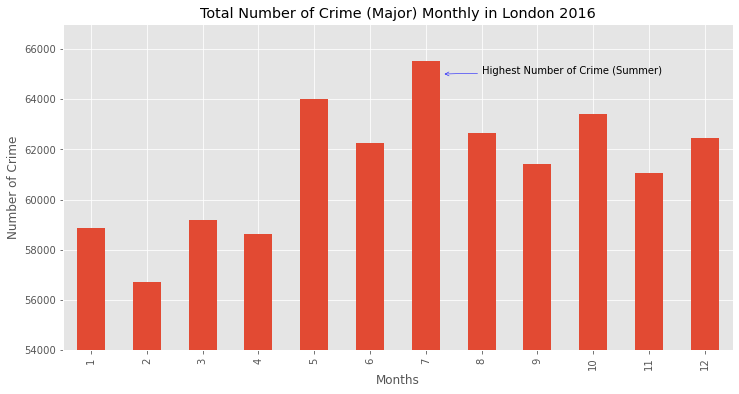

In [8]:
# buat bar plot berdasarkan total angka perbulan dari data yang ada
df_by_month['Total'].plot(kind='bar', figsize=(12,6))

plt.annotate('Highest Number of Crime (Summer)', xy=(6.3,65000), arrowprops=dict(arrowstyle='->', color='b'),xytext=((7,65000)))
plt.ylim(54000,67000)
plt.title('Total Number of Crime (Major) Monthly in London 2016')
plt.xlabel('Months')
plt.ylabel('Number of Crime')

plt.show()

###### dari barplot diatas, pada 2016 kita dapat mengetahui :
- Angka kejahatan tertinggi ada pada bulan Juli
- Angka kejahatan tinggi pada Musim panas (Summer)
- Angka kejahatan terendah ada pada bulan Februari

#### Lets take a look of crime trend in London

In [9]:
# mengelompokkan data total kejahatan berdasarkan major category dan tahun
df_by_major = df.groupby(['major_category', 'year'])['value'].sum().reset_index()

# membuat data dengan metode pivot table, sehingga kita dapat membuat major category menjadi index
df_by_major = pd.pivot_table(df_by_major, values='value', index='major_category', columns='year')

# membuat kolom total, agar kita dapat mengetahui total angka kejahatan per major category
df_by_major['Total'] = df_by_major.sum(axis=1)
df_by_major.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
major_category,,,,,,,,,,
Burglary,88092,90619,86826,93315,93392,87222,76053,70489,68285,754293
Criminal Damage,91872,85565,77897,70914,62158,56206,59279,62976,64071,630938
Drugs,68804,60549,58674,57550,51776,50278,44435,39785,38914,470765
Fraud or Forgery,5325,0,0,0,0,0,0,0,0,5325
Other Notifiable Offences,10112,10644,10768,10264,10675,10811,13037,14229,15809,106349


#### Bagaimana kontribusi dari 5 Kejahatan yang paling sedikit terjadi di London ?

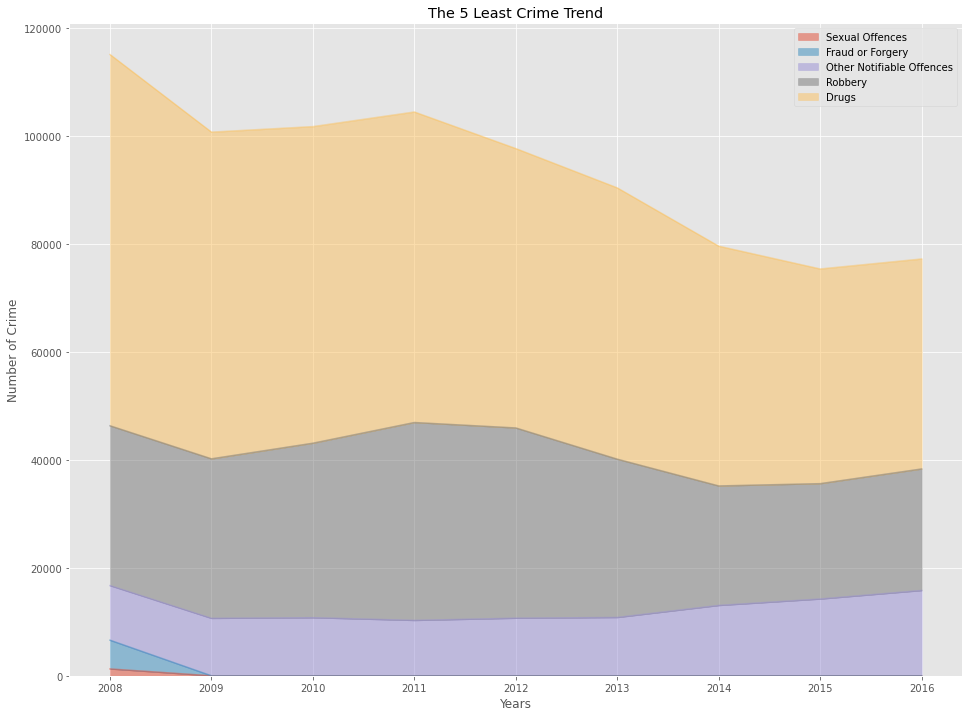

In [10]:
# sort data berdasarkan total per major category dan ambil 5 data total terkecil
df_least5_crime = df_by_major.sort_values(by='Total')[:5]

# membuat area plot berdasarkan data diatas
df_least5_crime.drop('Total',axis=1).transpose().plot(kind='area', figsize=(16,12), alpha=0.5, stacked=True)
plt.legend(loc='upper right')
plt.title('The 5 Least Crime Trend')
plt.xlabel('Years')
plt.ylabel('Number of Crime')
plt.show()

##### dari area plot diatas, kita mengetahui bahwa :
- sexual offence, fraud or forgery, robbery, drugs dan other notifiable offence adalah 5 major category yang paling sedikit terjadi
- sexual offence dan fraud or forgery sangat sedikit terjadi, dan hampir tidak terjadi sejak 2010 dibandingkan dengan ketiga yang lainnya.

#### Bagaimana Persentase Kejahatan (Major Category) yang terjadi di London dari 2008 - 2016 ?

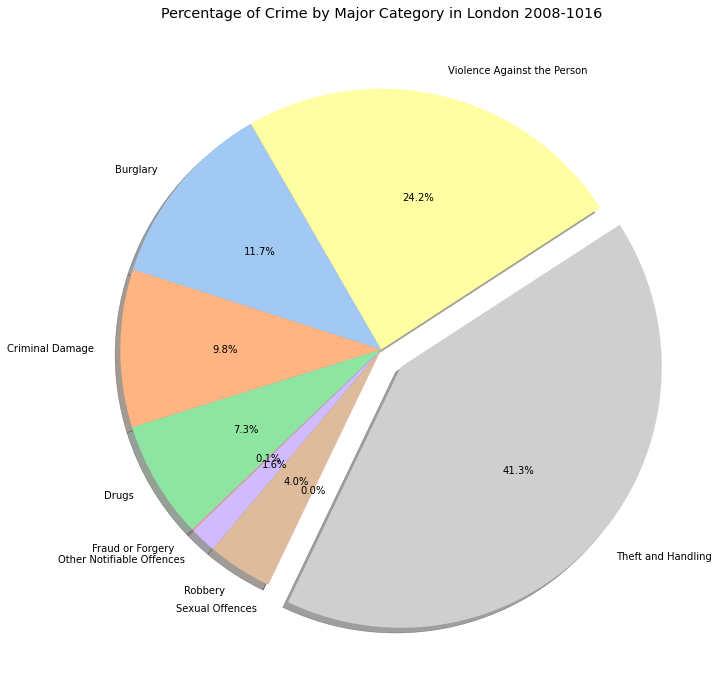

In [11]:
#mengatur warna untuk pie chart
colors = sns.color_palette('pastel')[:9]

plt.figure(figsize=(12,12))
plt.pie(data=df_by_major,
        x='Total',
        labels = df_by_major.index,
        colors = colors,
        autopct='%1.1f%%',
        startangle=120,
        shadow=True,
        explode=[0,0,0,0,0,0,0,0.1,0]
       )
plt.title('Percentage of Crime by Major Category in London 2008-1016')
plt.show()

##### berdasarkan pie chart diatas, dapat diketahui pada 2008-2016 :
- Theft and handling merupakan major category angka dan persentase nya tertinggi di London sekitar 41%, diikuti oleh violance against person dan burglary
- sexual offence, fraud or forgery, dan other notifiable offence merupakan major category yang paling sedikit di London

#### Bagaimana kontribusi Minor Category Crime terhadap Theft and Handling di London pada 2008-2016 ?

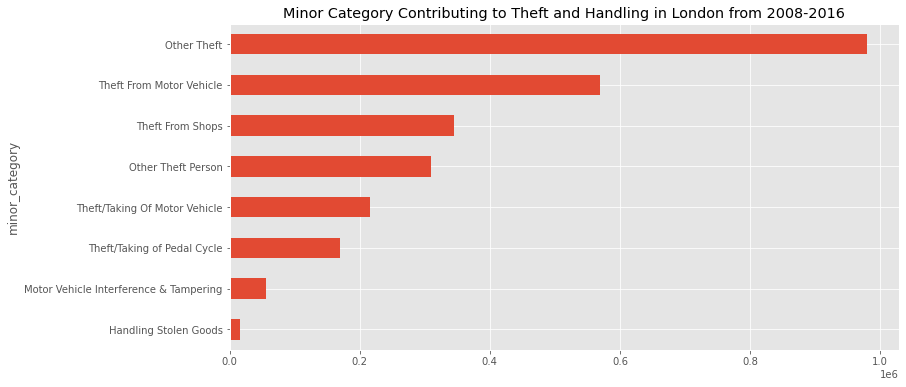

In [12]:
# bar chart
df_theft = df[df['major_category'] == 'Theft and Handling'].groupby('minor_category')['value'].sum()

df_theft.sort_values().plot(kind='barh', figsize=(12,6))
plt.title('Minor Category Contributing to Theft and Handling in London from 2008-2016')

plt.show()

##### Theft dan handling merupakan major category yang paling tinggi angka kejahatannya di London. Kontribusi Minor Category terhadap Theft and Handling :
- Other theft, Theft from Motorcycle, theft from shops, merupakan minor category yang berkontribusi terhadap Theft and handling di London
- Handling stolen goods merupakan category yang paling sedikit berkontribusi terhadap Theft and handling di London

#### Bagaimana Persebaran total Theft and Handling Crime di London pada 2008-2016 ?

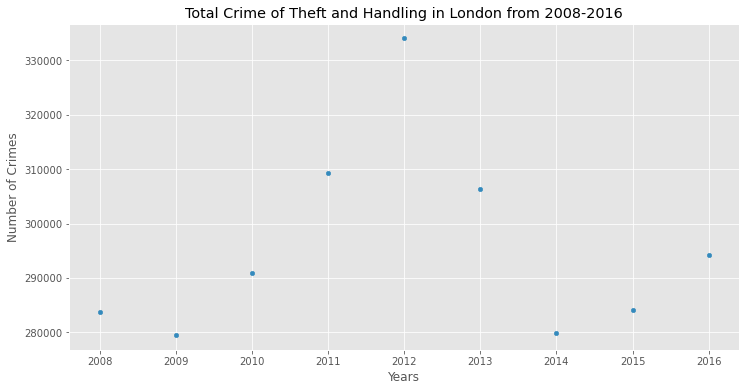

In [13]:
#mengambil data berdasarkan Theft and Handling per-tahun
theft_per_year = df[df['major_category'] == 'Theft and Handling'].groupby('year')['value'].sum().reset_index()

#plot scatter dari data yang sudah diambil
theft_per_year.plot(kind='scatter', x='year', y='value', figsize=(12,6))
plt.title('Total Crime of Theft and Handling in London from 2008-2016')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

plt.show()

##### Berdasarkan scatter plot diatas :
- 2012 merupakan tahun dimana Theft and Handling banyak terjadi di London sebanyak 330.000an kasus
- tahun 2009 merupakan angka terkecil theft and handling terjadi sekitar kurang dari 280.000an 
- walaupun menurun sejak tahun 2013, tetapi dapat kita lihat ada tren naik sejak 2015

#### Bagaimana angka distribusi kejahatan yang terjadi di 5 Sektor dengan angka kejahatan tertinggi di London 2008-2016? 

In [14]:
# mengelompokkan data total kejahatan berdasarkan major category dan tahun
df_by_borough = df.groupby(['borough', 'year'])['value'].sum().reset_index()

# membuat data dengan metode pivot table, sehingga kita dapat membuat major category menjadi index
df_by_borough = pd.pivot_table(df_by_borough, values='value', index='borough', columns='year')

# membuat kolom total, agar kita dapat mengetahui total angka kejahatan per major category
df_by_borough['Total'] = df_by_borough.sum(axis=1)
df_by_borough.sort_values(by='Total')

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
City of London,0,0,0,69,157,110,115,151,178,780
Kingston upon Thames,10661,10163,10171,10155,9956,9191,9288,9738,9983,89306
Richmond upon Thames,11106,10618,10601,10896,11168,10439,10456,10413,11074,96771
Sutton,12943,12240,12032,11068,10948,10057,10443,10598,10658,100987
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Merton,13875,13561,13595,13548,12856,11595,11596,12273,12755,115654
Harrow,13774,13948,13945,12801,12803,11914,11909,12601,13153,116848
Havering,15395,14538,14957,15496,15965,15089,14734,15870,16903,138947
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447


In [15]:
#mengambil data 5 Borough dengan angka kejahatan tertinggi
df_t = df_by_borough.sort_values(by='Total', ascending=False)[:5]

#transpose index dan column agar mempermudah pembuatan histogram
df_t = df_t.drop(columns='Total').transpose()
df_t

borough,Westminster,Lambeth,Southwark,Camden,Newham
year,,,,,
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090


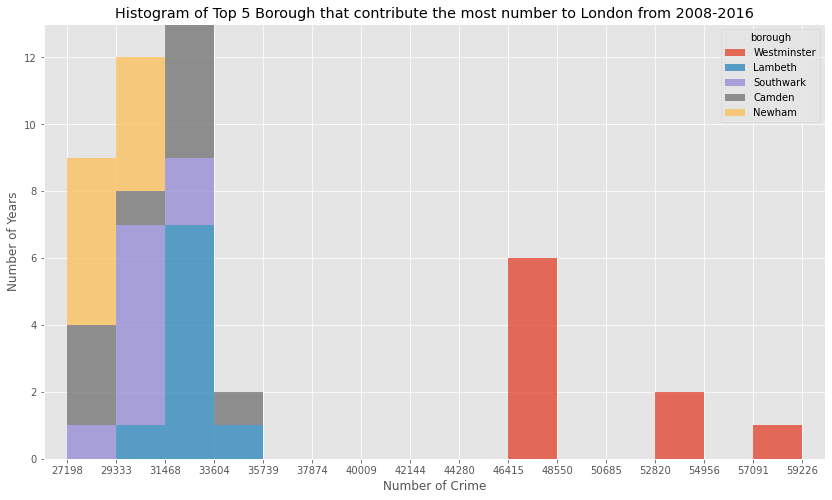

In [16]:
# membuat bin untuk histogram
count, bin_edges = np.histogram(df_t, 15)

# sedikit mempercantik letak histogram
xmin = bin_edges[0] - 1000
xmax = bin_edges[-1] + 1000

df_t.plot(kind='hist',
          figsize=(14,8),
          bins = 15,
          alpha=0.8,
          xticks=bin_edges,
          stacked=True,
          xlim=(xmin,xmax)
         )
plt.title('Histogram of Top 5 Borough that contribute the most number to London from 2008-2016')
plt.ylabel('Number of Years')
plt.xlabel('Number of Crime')
plt.show()

##### dari histogram diatas, dapat diketahui bahwa :
- Westminster, Lambeth, Southwark, Camden, Newham merupakan 5 Borough dengan angka kejahatan tertinggi di London dari 2008-2016
- Persebaran angka dari Westminster merupakan yang tertinggi, dimulai dari 46.000an pertahunnya.
- Sedangkan 4 Borough lainnya tersebar dikisaran 27.000an sampai tidak lebih dari 36.000.

#### Kita ketahui bahwa Westminster merupakan daerah dengan angka Kejahatan tertinggi di London, bagaimana persebaran angkanya ?

In [17]:
# sort the data to find where is Borough with the most crime
df_by_borough.sort_values(by='Total', ascending=False).head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
borough,,,,,,,,,,
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024


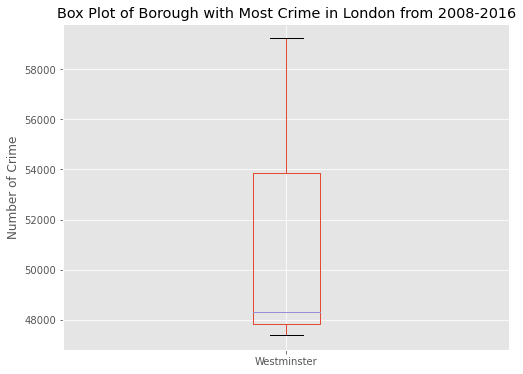

In [18]:
#membuat box plot dari data yang ada
df_by_borough.drop(columns='Total').loc['Westminster'].plot(kind='box',figsize=(8,6))

plt.title('Box Plot of Borough with Most Crime in London from 2008-2016')
plt.ylabel('Number of Crime')
plt.show()

##### Dari Boxplot diatas, kita dapat mengetahui :
- angka maximum dari kejahatan yang terjadi pada Westminster sekitar 60.000an
- angka minimum dari kejahatan yang terjadi pada Westminster sekitar 47.000an
- nilai median ada pada sekitar 48.000an
- dimana angka kejahatan sering terjadi pertahunnya disekitar 48.000an - 53.000an

#### Buat visualisasi word cloud berdasarkan Nama Borough

In [19]:
# buat wordcloud terlebih dahulu berdasarkan nama Borough dan jumlah Total Kejahatan

#mengambil total kejahatan dari data
total_crime = df_by_borough['Total'].sum()

#membuat batasan untuk maximum word
max_words = 90

#membuat word string
word_string = ''

#mengisi wordstring
for borough in df_by_borough.index.values:
    
    #memisahkan kata apabila 2 atau lebih
    if len(borough.split(' ')) == 1:
        #menghitung banyaknya kata
        repeat_num_times = int(df_by_borough.loc[borough,'Total']/float(total_crime)*max_words)
        #mengisi wordstring kata sebanyak berapa kali munculnya
        word_string = word_string + ((borough + ' ')* repeat_num_times)

wordcloud = WordCloud(background_color='white').generate(word_string)

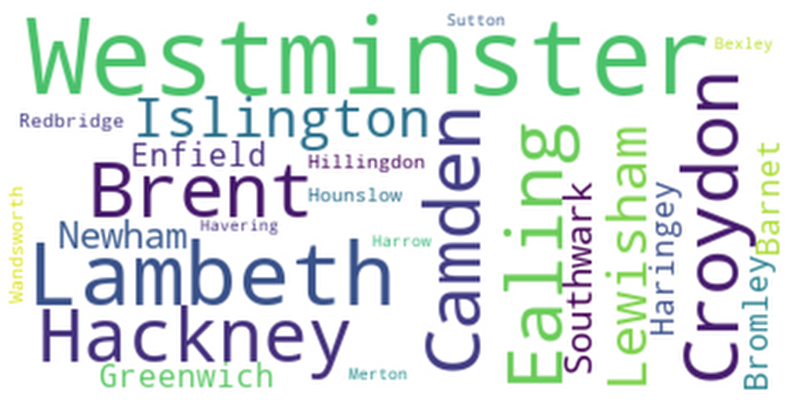

In [20]:
# visualisasikan wordcloud yang telah dibuat
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bessel')
plt.axis('off')
plt.show()

##### Dari wordclouds diatas, Kita dapat melihat Borough yang paling Banyak kejahatan dari Kata yang makin besar dan warna makin gelap. Borough yang paling banyak kejahatan adalah Westminster, Lambeth, Brenth dan lainnya. 
Sehingga, apabila ada pertanyaan tentang Borough yang paling banyak kejahatannya, maka akan dikaitkan dengan kata "Westminster"

#### Peta Choropleth yang Menggambarkan Kejahatan yang Terjadi Pada London di 2016

In [21]:
#mengambil geojson london
london_borough = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson'

#membuat map london dengan folium
london_map = folium.Map(location=[51.507359, -0.136439], zoom_start=9.5, tiles='Stamen Terrain')

#mengambil angka kejahatan yang terjadi di borough pada tahun 2016
borough = df_by_borough.reset_index()[['borough', 2016]]

london_map.choropleth(
    geo_data=london_borough,
    data=borough,
    columns=['borough', 2016],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Crime in London'
)

#panggil map choropleth
london_map

C:\Users\62852\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


##### Dari Map Choropleth diatas, kita dapat mengetahui bahwa makin merah/gelap area di peta, maka makin tinggi angka kejatannya pada 2016.
- Map yang paling gelap adalah Westminster, dimana borough tersebut adalah angka kejahatannya paling tinggi.

### Kesimpulan

#### Dari data yang telah kita gali informasi nya diatas, maka dapat disimpulkan bahwa :

- angka kejahatan paling tinggi ada pada tahun 2008 dan terendah ada pada tahun 2014
- walaupun sempat turun sejak 2013, tetapi angka kejahatan mulai naik lagi saat 2015
- kejahatan sering terjadi pada musim Panas(Summer).
- Theft and handling merupakan major category angka dan persentase nya tertinggi di London dari 2008-2016.
- Other theft , thef from motor vehicle, theft from shops, merupakan minor kategori dari Theft and Handling yang paling banyak terjadi di London.
- sexual offence, fraud or forgery, dan other notifiable offence merupakan major category yang paling sedikit di London dari 2008-2016.
- Westminster, Lambeth, Southwark, Camden, Newham merupakan 5 Borough dengan angka kejahatan tertinggi di London dari 2008-2016.
- City of London memiliki angka kejahatan paling kecil dan sangat kecil dibandingkan dengan Borough yang lainnya.




#### saran, peluang dan informasi yang dapat kita dapatkan dari informasi diatas adalah :
- Memperbanyak petugas keamanan disetiap sudut London
- Pemerintah Kota London dapat memperbanyak petugas keamanan di Westminster, Lambeth, Southwark, Camden, Newham. Terutama Westminster, karena angka pertahun nya lebih tinggi daripada daerah lainnya di London.
- Diharapkan Penduduk dan Turis di kota-kota yang memiliki angka kejahatan tinggi dapat lebih teliti dan sadar akan keamanan harta.
- Lebih berjaga-jaga disaat memasuki musim panas/summer, terutama turis yang berliburan di daerah angka kejahatan tertinggi.
- Menggunakan CCTV disetiap tempat agar saat terjadi kejahatan, dapat mempermudah melacak pelakunya
- Untuk perusahaan teknologi produk keamanan, dapat memperkuat penjualan didaerah angka kejahatan tinggi seperti Westminster.
- Untuk perusahaan teknologi produk keamanan, dapat menjual barang-barang yang mencegah pencurian di kendaraan, toko, rumah dan diri sendiri. Dapat berupa CCTV, alarm, atau melacak harta berharga.
- Menyebar informasi yang mudah dimengerti seperti Peta Choropleth, sehingga orang-orang mengetahui didaerah mana harus Menambah pengamanan yang ekstra.